<a href="https://colab.research.google.com/github/JunandaSap/TA/blob/main/ST_ELevasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wfdb librosa matplotlib

import os
import zipfile
import wfdb
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter
from imblearn.over_sampling import SMOTE
from google.colab import drive
from google.colab import drive

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 4.2 MB/s eta 0:00:00


In [ ]:
# Hubungkan Google Colab dengan Google Drive
drive.mount('/content/drive')

zip_file_path = '/content/drive/MyDrive/TA/ptb-diagnostic-ecg-database-1.0.0.zip'

extract_dir = '/content/extracted_zip'
os.makedirs(extract_dir, exist_ok=True)

# Ekstrak file zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
print("File yang diekstrak:")
print(os.listdir(extract_dir))

Mounted at /content/drive
File yang diekstrak:
['ptb-diagnostic-ecg-database-1.0.0']


In [ ]:
# Melihat isi dari folder yang diekstrak
dataset_folder = os.path.join(extract_dir, 'ptb-diagnostic-ecg-database-1.0.0')
inner_files = os.listdir(dataset_folder)
print(inner_files)

['patient069', 'patient216', 'patient168', 'patient262', 'patient079', 'patient154', 'patient130', 'patient040', 'patient208', 'patient148', 'patient252', 'patient030', 'patient188', 'patient179', 'patient026', 'patient173', 'patient062', 'patient214', 'patient011', 'patient018', 'patient178', 'patient074', 'patient072', 'patient276', 'patient086', 'patient004', 'patient287', 'patient273', 'patient044', 'patient136', 'patient083', 'patient099', 'patient174', 'patient014', 'patient080', 'patient071', 'patient247', 'patient246', 'patient107', 'patient113', 'patient182', 'patient222', 'patient095', 'patient125', 'patient215', 'patient021', 'patient029', 'patient176', 'patient006', 'patient192', 'patient144', 'patient097', 'patient126', 'patient081', 'patient047', 'patient128', 'patient255', 'patient146', 'patient228', 'patient175', 'patient052', 'patient034', 'patient016', 'patient221', 'patient293', 'patient177', 'patient162', 'patient206', 'patient166', 'patient068', 'patient022', 'pati

In [ ]:
!pip install neurokit2 scipy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.1/693.1 kB 14.9 MB/s eta 0:00:00


In [ ]:
import os
import wfdb

# Path to the extracted dataset
base_path = 'extracted_zip/ptb-diagnostic-ecg-database-1.0.0/'

# Function to process each patient's ECG data
def process_patient_data(patient_path):
    for record_name in os.listdir(patient_path):
        if record_name.endswith('.dat'):
            record_path = os.path.join(patient_path, record_name[:-4])  # Remove .dat to get record base name
            record = wfdb.rdrecord(record_path)
            print(f"Patient: {patient_path.split('/')[-1]}")
            print(f"Record Name: {record.record_name}")
            print(f"Signal Names: {record.sig_name}")
            print(f"Sampling Frequency: {record.fs}")
            print(f"Signal Shape: {record.p_signal.shape}")
            # You can further analyze or extract ST-elevation from these signals

# Loop through each patient directory
for patient_dir in os.listdir(base_path):
    patient_path = os.path.join(base_path, patient_dir)
    if os.path.isdir(patient_path):  # Check if it's a directory
        process_patient_data(patient_path)


Patient: patient069
Record Name: s0233lre
Signal Names: ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz']
Sampling Frequency: 1000
Signal Shape: (115200, 15)
Patient: patient069
Record Name: s0232lre
Signal Names: ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz']
Sampling Frequency: 1000
Signal Shape: (115200, 15)
Patient: patient069
Record Name: s0234lre
Signal Names: ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz']
Sampling Frequency: 1000
Signal Shape: (115200, 15)
Patient: patient069
Record Name: s0284lre
Signal Names: ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz']
Sampling Frequency: 1000
Signal Shape: (115200, 15)
Patient: patient216
Record Name: s0438_re
Signal Names: ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz']
Sampling Frequency: 1000
Signal Shape: (12

#GAMBAR


In [ ]:
# # Function to plot ECG signal for a given record with MI type
# def plot_ecg_signal(record_path, patient_id, mi_type, leads=['v1', 'v2', 'v3', 'v4', 'v5', 'v6']):
#     record = wfdb.rdrecord(record_path)
#     fs = record.fs  # Sampling frequency

#     plt.figure(figsize=(12, 8))
#     for lead in leads:
#         if lead in record.sig_name:
#             lead_index = record.sig_name.index(lead)
#             signal = record.p_signal[:, lead_index]
#             time = [i / fs for i in range(len(signal))]
#             plt.plot(time, signal, label=lead.upper())

#     plt.title(f"ECG Signal for Patient {patient_id} - {record.record_name}\nDiagnosis: {mi_type}")
#     plt.xlabel("Time (s)")
#     plt.ylabel("Amplitude (mV)")
#     plt.legend()
#     plt.show()

# # Loop through each patient directory
# for patient_dir in os.listdir(base_path):
#     patient_path = os.path.join(base_path, patient_dir)
#     if os.path.isdir(patient_path):
#         for record_name in os.listdir(patient_path):
#             if record_name.endswith('.dat'):
#                 # Detect MI type from the corresponding .hea file
#                 header_path = os.path.join(patient_path, record_name.replace('.dat', '.hea'))
#                 mi_type = detect_mi_type_in_hea(header_path)

#                 # Plot ECG signal with MI type if a valid type is found
#                 if mi_type != "UNKNOWN":
#                     record_path = os.path.join(patient_path, record_name[:-4])  # Remove .dat to get record base name
#                     plot_ecg_signal(record_path, patient_id=patient_dir, mi_type=mi_type)


In [ ]:
import os
import wfdb
import numpy as np
import pandas as pd
from scipy.signal import find_peaks

# Path to the extracted dataset
base_path = 'extracted_zip/ptb-diagnostic-ecg-database-1.0.0/'

# Parameters for ST-elevation calculation
J_POINT_OFFSET = 0.08  # 80 ms after QRS in seconds
ST_SEGMENT_DURATION = 0.04  # 40 ms for ST segment average calculation

def calculate_all_st_elevations(signal, fs, qrs_peaks):
    """
    Menghitung semua nilai ST-elevasi sepanjang sinyal.

    Parameters:
    - signal: Array sinyal ECG
    - fs: Frekuensi sampling
    - qrs_peaks: Array indeks QRS peaks dalam sinyal

    Returns:
    - st_elevations: Array nilai ST-elevasi sepanjang sinyal
    """
    J_point_sample = int(J_POINT_OFFSET * fs)
    ST_segment_samples = int(ST_SEGMENT_DURATION * fs)

    st_elevations = []

    for peak in qrs_peaks:
        j_point = peak + J_point_sample

        # Pastikan indeks dalam batas sinyal
        if j_point + ST_segment_samples < len(signal):
            baseline = np.mean(signal[peak - J_point_sample:peak])  # Baseline before J point
            ST_segment_value = np.mean(signal[j_point:j_point + ST_segment_samples])
            ST_elevation = ST_segment_value - baseline
            st_elevations.append(ST_elevation)

    return st_elevations

def process_patient_data(patient_path, output_data):
    for record_name in os.listdir(patient_path):
        if record_name.endswith('.dat'):
            record_path = os.path.join(patient_path, record_name[:-4])  # Remove .dat to get record base name
            try:
                record = wfdb.rdrecord(record_path)
                fs = record.fs  # Sampling frequency

                patient_id = patient_path.split('/')[-1]
                record_id = record.record_name

                for lead_index, lead_name in enumerate(record.sig_name):
                    # Process only leads V1 to V6
                    if lead_name.lower() in ['v1', 'v2', 'v3', 'v4', 'v5', 'v6']:
                        signal = record.p_signal[:, lead_index]

                        # Deteksi QRS peaks (misalnya, menggunakan deteksi puncak sederhana)
                        qrs_peaks, _ = find_peaks(signal, distance=int(0.6 * fs))  # Sesuaikan parameter distance

                        # Hitung semua ST-elevasi sepanjang sinyal
                        st_elevations = calculate_all_st_elevations(signal, fs, qrs_peaks)

                        # Simpan data dalam format dictionary untuk nanti disimpan ke DataFrame
                        for idx, st_elevation in enumerate(st_elevations):
                            output_data.append({
                                "Patient ID": patient_id,
                                "Record Name": record_id,
                                "Lead": lead_name.upper(),
                                "QRS Peak Index": qrs_peaks[idx],
                                "ST Elevation (mV)": st_elevation
                            })

            except Exception as e:
                print(f"Error processing {record_name}: {e}")

# Data untuk menyimpan hasil
output_data = []

# Loop through each patient directory and process the data
for patient_dir in os.listdir(base_path):
    patient_path = os.path.join(base_path, patient_dir)
    if os.path.isdir(patient_path):  # Check if it's a directory
        process_patient_data(patient_path, output_data)

# Convert data to DataFrame and save to CSV
output_df = pd.DataFrame(output_data)
output_df.to_csv('st_elevations_results.csv', index=False)

print("Hasil ST-elevasi disimpan ke dalam 'st_elevations_results.csv'")


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Hasil ST-elevasi disimpan ke dalam 'st_elevations_results.csv'


In [ ]:
import pandas as pd

# Baca file CSV
file_path = 'st_elevations_results.csv'
data = pd.read_csv(file_path)

# Tampilkan isi CSV
print(data)

        Patient ID Record Name Lead  QRS Peak Index  ST Elevation (mV)
0       patient069    s0233lre   V1              83          -0.207769
1       patient069    s0233lre   V1             777           0.053831
2       patient069    s0233lre   V1            1972          -0.231869
3       patient069    s0233lre   V1            2927          -0.224387
4       patient069    s0233lre   V1            3848          -0.215475
...            ...         ...  ...             ...                ...
439987  patient064    s0220lre   V6          112182           0.011181
439988  patient064    s0220lre   V6          112851           0.006725
439989  patient064    s0220lre   V6          113517          -0.011769
439990  patient064    s0220lre   V6          114187           0.006244
439991  patient064    s0220lre   V6          114858          -0.012025

[439992 rows x 5 columns]


In [ ]:
import pandas as pd

# Baca file CSV
file_path = 'st_elevations_results.csv'
data = pd.read_csv(file_path)

# Hapus baris dengan nilai NaN atau kosong
data_cleaned = data.dropna()

# Tampilkan data yang telah dibersihkan
print(data_cleaned)


        Patient ID Record Name Lead  QRS Peak Index  ST Elevation (mV)
0       patient069    s0233lre   V1              83          -0.207769
1       patient069    s0233lre   V1             777           0.053831
2       patient069    s0233lre   V1            1972          -0.231869
3       patient069    s0233lre   V1            2927          -0.224387
4       patient069    s0233lre   V1            3848          -0.215475
...            ...         ...  ...             ...                ...
439987  patient064    s0220lre   V6          112182           0.011181
439988  patient064    s0220lre   V6          112851           0.006725
439989  patient064    s0220lre   V6          113517          -0.011769
439990  patient064    s0220lre   V6          114187           0.006244
439991  patient064    s0220lre   V6          114858          -0.012025

[439064 rows x 5 columns]


In [ ]:
import pandas as pd

# Baca dataset hasil ST-elevasi
data = pd.read_csv('st_elevations_results.csv')

# Periksa kolom yang ada
print("Kolom dalam dataset:", data.columns)

# Ekstraksi fitur ST-elevasi
features = data.groupby('Record Name').agg(
    st_mean=('ST Elevation (mV)', 'mean'),
    st_std=('ST Elevation (mV)', 'std'),
    st_max=('ST Elevation (mV)', 'max'),
    st_min=('ST Elevation (mV)', 'min'),
    st_range=('ST Elevation (mV)', lambda x: x.max() - x.min())
).reset_index()

# Simpan hasil fitur ekstraksi
features.to_csv('st_elevations_features.csv', index=False)
print("Fitur ekstraksi ST-elevasi telah disimpan di 'st_elevations_features.csv'")


Kolom dalam dataset: Index(['Patient ID', 'Record Name', 'Lead', 'QRS Peak Index',
       'ST Elevation (mV)'],
      dtype='object')
Fitur ekstraksi ST-elevasi telah disimpan di 'st_elevations_features.csv'


In [ ]:
import os
import wfdb
import pandas as pd

# Path dataset
base_path = 'extracted_zip/ptb-diagnostic-ecg-database-1.0.0/'

# Fungsi untuk menentukan kelas berdasarkan diagnosis
def get_class_from_diagnosis(header_path):
    """
    Membaca file .hea untuk menentukan kelas diagnosis pasien.
    """
    with open(header_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if 'Reason for admission' in line:
                # Identifikasi diagnosis hanya untuk Myocardial Infarction dan Healthy Controls
                if 'Myocardial infarction' in line:
                    return 1  # Myocardial Infarction
                elif 'Healthy control' in line:
                    return 0  # Healthy Controls
    return None  # Kelas lainnya diabaikan

# Proses data pasien dan simpan hasil
dataset = []

def process_patient_data(patient_path):
    """
    Memproses data setiap pasien dan menyimpan nama rekaman serta kelasnya.
    """
    for record_name in os.listdir(patient_path):
        if record_name.endswith('.hea'):
            header_path = os.path.join(patient_path, record_name)
            record_base_name = os.path.splitext(record_name)[0]

            # Baca kelas diagnosis
            record_class = get_class_from_diagnosis(header_path)
            if record_class is not None:  # Hanya simpan jika diagnosis adalah MI atau normal
                dataset.append((record_base_name, record_class))
                # Opsional: Menampilkan informasi diagnosis
                print(f"Record: {record_base_name}, Class: {record_class}")

# Loop melalui direktori pasien
for patient_dir in os.listdir(base_path):
    patient_path = os.path.join(base_path, patient_dir)
    if os.path.isdir(patient_path):  # Pastikan itu direktori
        process_patient_data(patient_path)

# Simpan dataset ke file CSV
df = pd.DataFrame(dataset, columns=['Record Name', 'Class'])
df.to_csv('ecg_mi_vs_normal_dataset.csv', index=False)
print("Dataset has been saved to 'ecg_mi_vs_normal_dataset.csv'")


Record: s0233lre, Class: 1
Record: s0232lre, Class: 1
Record: s0234lre, Class: 1
Record: s0284lre, Class: 1
Record: s0263lre, Class: 1
Record: s0257lre, Class: 1
Record: s0269lre, Class: 1
Record: s0256lre, Class: 1
Record: s0133lre, Class: 1
Record: s0131lre, Class: 1
Record: s0219lre, Class: 1
Record: s0130lre, Class: 1
Record: s0335lre, Class: 1
Record: s0487_re, Class: 0
Record: s0153lre, Class: 1
Record: s0099lre, Class: 1
Record: s0117lre, Class: 1
Record: s0107lre, Class: 1
Record: s0088lre, Class: 1
Record: s0095lre, Class: 1
Record: s0305lre, Class: 0
Record: s0212lre, Class: 1
Record: s0436_re, Class: 0
Record: s0067lre, Class: 1
Record: s0044lre, Class: 1
Record: s0039lre, Class: 1
Record: s0049lre, Class: 1
Record: s0082lre, Class: 1
Record: s0054lre, Class: 1
Record: s0059lre, Class: 1
Record: s0241lre, Class: 1
Record: s0239lre, Class: 1
Record: s0406lre, Class: 1
Record: s0245lre, Class: 1
Record: s0244lre, Class: 1
Record: s0318lre, Class: 1
Record: s0240lre, Class: 1
R

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'ecg_mi_vs_normal_dataset.csv'  # Ganti dengan path file Anda
data = pd.read_csv(file_path)

# Count the occurrences of each class
class_counts = data['Class'].value_counts()

# Display the counts
print("Jumlah rekaman untuk masing-masing kelas:")
print(f"MI (1): {class_counts[1]}")
print(f"Normal (0): {class_counts[0]}")

output_path = 'class_counts.csv'
class_counts.to_csv(output_path, index=True, header=['Count'])

output_path

Jumlah rekaman untuk masing-masing kelas:
MI (1): 368
Normal (0): 80


'class_counts.csv'

In [ ]:
!pip install -U imbalanced-learn


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 1. Baca dataset ST-elevasi dan dataset kelas multiklas
st_dataset = pd.read_csv('st_elevations_features.csv')  # Fitur ST-elevasi
class_dataset = pd.read_csv('ecg_mi_vs_normal_dataset.csv')  # Dataset kelas multiklas

# 2. Gabungkan dataset berdasarkan Record Name
merged_dataset = pd.merge(st_dataset, class_dataset, on='Record Name')

# 3. Pisahkan fitur dan label
X = merged_dataset[['st_mean', 'st_std', 'st_max', 'st_min', 'st_range']]
y = merged_dataset['Class']  # Kolom Class dari ecg_multiclass_dataset.csv

# # 4. Hitung distribusi kelas sebelum split
# print("Distribusi Kelas Sebelum Split:")
# print(y.value_counts())

# 5. Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# # 6. Hitung distribusi kelas setelah split
# print("Distribusi Kelas Setelah Split:")
# print("Training Set:")
# print(y_train.value_counts())
# print("Testing Set:")
# print(y_test.value_counts())

# 7. Terapkan SMOTE untuk menyeimbangkan kelas pada data pelatihan
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 8. Standarisasi fitur
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# 9. Optimasi parameter SVM menggunakan GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': [0.01, 0.1, 1, 'scale'],
    'kernel': ['rbf'],
    'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train_resampled, y_train_resampled)

# 10. Model terbaik dari GridSearch
best_model = grid_search.best_estimator_
print(f"Best Model Parameters: {grid_search.best_params_}")

# 11. Prediksi pada set pengujian
y_pred = best_model.predict(X_test)

# 12. Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")

# 13. Laporan klasifikasi
report = classification_report(y_test, y_pred, zero_division=0)
print("Laporan Klasifikasi:")
print(report)

# 14. Analisis confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Testing Set):")
print(cm)

# 15. Perhitungan sensitivitas, spesifisitas, dan F1-score
# Sensitivitas (Recall untuk kelas 1)
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1]) if (cm[1, 0] + cm[1, 1]) != 0 else 0

# Spesifisitas (Recall untuk kelas 0)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) != 0 else 0

# F1 Score makro (rata-rata antar kelas)
f1_scores = classification_report(y_test, y_pred, output_dict=True, zero_division=0)['macro avg']['f1-score']

# Cetak hasil evaluasi
print(f"\nHasil Evaluasi:")
print(f"Akurasi: {accuracy * 100:.2f}%")
print(f"Sensitivitas (Recall Kelas 1): {sensitivity:.2f}")
print(f"Spesifisitas (Recall Kelas 0): {specificity:.2f}")
print(f"F1 Score (Macro Average): {f1_scores:.2f}")


Best Model Parameters: {'C': 10, 'class_weight': 'balanced', 'gamma': 1, 'kernel': 'rbf'}
Akurasi: 85.29%
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.55      0.92      0.69        12
           1       0.98      0.84      0.90        56

    accuracy                           0.85        68
   macro avg       0.76      0.88      0.80        68
weighted avg       0.90      0.85      0.87        68

Confusion Matrix (Testing Set):
[[11  1]
 [ 9 47]]

Hasil Evaluasi:
Akurasi: 85.29%
Sensitivitas (Recall Kelas 1): 0.84
Spesifisitas (Recall Kelas 0): 0.92
F1 Score (Macro Average): 0.80


In [ ]:
# Cetak hasil evaluasi
print(f"\nHasil Evaluasi:")
print(f"Akurasi: {accuracy * 100:.2f}%")
print(f"Sensitivitas (Recall Kelas 1): {sensitivity * 100:.2f}")
print(f"Spesifisitas (Recall Kelas 0): {specificity* 100:.2f}")
print(f"F1 Score (Macro Average): {f1_scores* 100:.2f}")


Hasil Evaluasi:
Akurasi: 85.29%
Sensitivitas (Recall Kelas 1): 83.93
Spesifisitas (Recall Kelas 0): 91.67
F1 Score (Macro Average): 79.57


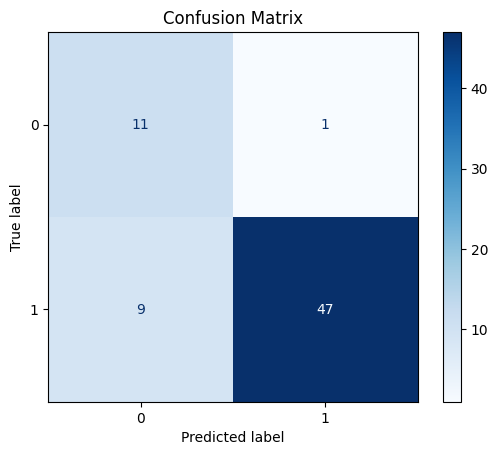

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Buat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print(f"Total data: {len(X)}")
print(f"Training data: {len(X_train)}")
print(f"Testing data: {len(X_test)}")


Total data: 448
Training data: 380
Testing data: 68


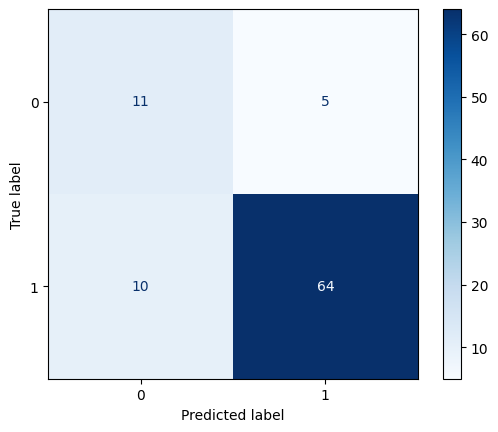

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.show()

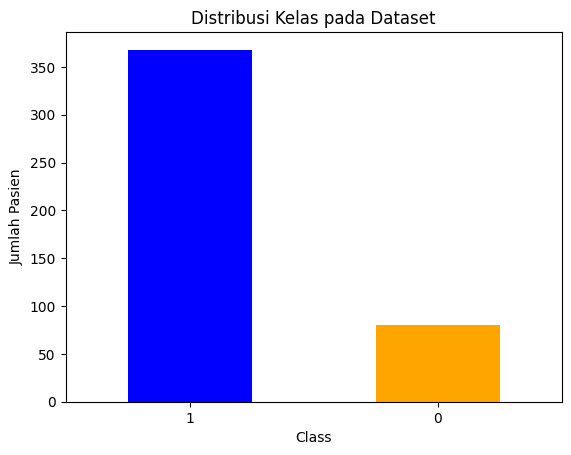

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi distribusi kelas
y.value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribusi Kelas pada Dataset')
plt.xlabel('Class')
plt.ylabel('Jumlah Pasien')
plt.xticks(rotation=0)
plt.show()


In [ ]:
!pip install niapy

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Best parameters: {'C': 2.085234843974574, 'kernel': 'rbf', 'gamma': 0.39970877847657704}
Best score (accuracy + specificity): 0.7944444444444445

Akurasi Terbaik: 72.22%
Sensitivitas Terbaik (Recall Kelas 1): 0.69
Spesifisitas Terbaik (Recall Kelas 0): 0.87
F1-Score Terbaik (Macro Avg): 0.66

Confusion Matrix:
[[13  2]
 [23 52]]


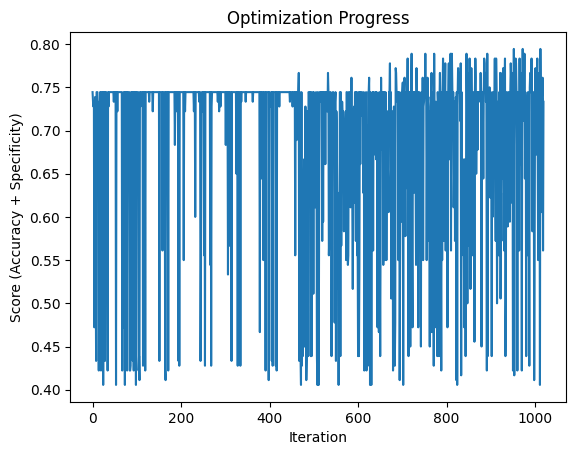

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import SMOTE
# from niapy.problems import Problem
# from niapy.task import OptimizationType, Task
# from niapy.algorithms.basic import ParticleSwarmAlgorithm
# import matplotlib.pyplot as plt

# # Fungsi untuk mendapatkan hyperparameter dari nilai partikel
# def get_hyperparameters(x):
#     C = 10 ** x[0]
#     kernel = 'rbf' if x[1] >= 0.5 else 'linear'
#     gamma = 10 ** x[2]
#     return {'C': C, 'kernel': kernel, 'gamma': gamma}

# # Fungsi untuk mendapatkan classifier berdasarkan hyperparameter
# def get_classifier(x):
#     params = get_hyperparameters(x)
#     return SVC(**params, probability=True)

# # Definisi masalah optimasi untuk SVM
# class SVMHyperparameterOptimization(Problem):
#     def __init__(self, X_train, y_train, X_test, y_test):
#         super().__init__(dimension=3, lower=[-1, 0, -1], upper=[2, 1, 2])  # C, kernel (binary), gamma
#         self.X_train = X_train
#         self.y_train = y_train
#         self.X_test = X_test
#         self.y_test = y_test
#         self.history = []  # Simpan nilai spesifisitas + akurasi tiap iterasi

#     def _evaluate(self, x):
#         model = get_classifier(x)
#         model.fit(self.X_train, self.y_train)
#         y_pred = model.predict(self.X_test)
#         cm = confusion_matrix(self.y_test, y_pred)
#         specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) != 0 else 0
#         accuracy = accuracy_score(self.y_test, y_pred)
#         score = 0.5 * accuracy + 0.5 * specificity  # Kombinasi akurasi dan spesifisitas
#         self.history.append(score)  # Simpan skor untuk visualisasi
#         return -score  # Negasikan untuk minimisasi

# # Baca dataset ST-elevasi dan dataset kelas multiklas
# st_dataset = pd.read_csv('st_elevations_features.csv')  # Fitur ST-elevasi
# class_dataset = pd.read_csv('ecg_mi_vs_normal_dataset.csv')  # Dataset kelas multiklas

# # Gabungkan dataset berdasarkan Record Name
# merged_dataset = pd.merge(st_dataset, class_dataset, on='Record Name')

# # Pisahkan fitur dan label
# X = merged_dataset[['st_mean', 'st_std', 'st_max', 'st_min', 'st_range']]
# y = merged_dataset['Class']  # Kolom Class dari ecg_multiclass_dataset.csv

# # Split data menjadi training dan testing set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Terapkan SMOTE untuk menyeimbangkan kelas pada data pelatihan
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Standarisasi fitur
# scaler = StandardScaler()
# X_train_resampled = scaler.fit_transform(X_train_resampled)
# X_test = scaler.transform(X_test)

# # Inisialisasi dan jalankan optimisasi
# problem = SVMHyperparameterOptimization(X_train_resampled, y_train_resampled, X_test, y_test)
# task = Task(problem, max_iters=50, optimization_type=OptimizationType.MINIMIZATION)
# algorithm = ParticleSwarmAlgorithm(population_size=20, seed=1234)

# best_params, best_score = algorithm.run(task)

# # Tampilkan hasil optimasi
# print('Best parameters:', get_hyperparameters(best_params))
# print('Best score (accuracy + specificity):', -best_score)

# # Evaluasi model terbaik
# best_model = get_classifier(best_params)
# best_model.fit(X_train_resampled, y_train_resampled)
# y_pred = best_model.predict(X_test)

# # Evaluasi metrik
# accuracy = accuracy_score(y_test, y_pred)
# cm = confusion_matrix(y_test, y_pred)
# sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1]) if (cm[1, 0] + cm[1, 1]) != 0 else 0  # Recall kelas 1
# specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) != 0 else 0  # Recall kelas 0
# f1_scores = classification_report(y_test, y_pred, output_dict=True, zero_division=0)['macro avg']['f1-score']

# # Tampilkan metrik terbaik
# print(f"\nAkurasi Terbaik: {accuracy * 100:.2f}%")
# print(f"Sensitivitas Terbaik (Recall Kelas 1): {sensitivity:.2f}")
# print(f"Spesifisitas Terbaik (Recall Kelas 0): {specificity:.2f}")
# print(f"F1-Score Terbaik (Macro Avg): {f1_scores:.2f}")

# # Confusion Matrix
# print("\nConfusion Matrix:")
# print(cm)

# # Visualisasi progres optimasi
# plt.plot(problem.history)
# plt.xlabel('Iteration')
# plt.ylabel('Score (Accuracy + Specificity)')
# plt.title('Optimization Progress')
# plt.show()
